## ROC
### The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.
## AUC
### The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
### The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.


### Problem Statement
#### We have a some data related to customer age and whether that customer has taken insurance or not. We need to make a model based on these data that will get the customer age as input and predict whether that customer will buy insurance or not. This is a typical binary classification problem i.e. output will be 0 or 1 ( 0 : Customer will not take insurance and 1: Customer will take insurance). Here we will build two models LogisticRegression and KNN and test the performance of both the model based on AUC_ROC curve.

In [1]:
#importing necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#read insurance_data.csv file. 
df = pd.read_csv("insurance_data.csv")

In [3]:
#display first five rows 
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0, 0.5, 'Insurance Taken')

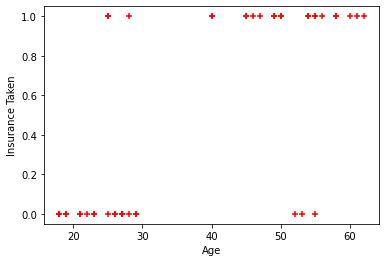

In [4]:
#check the distribution using Scatter Plot
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
plt.xlabel("Age")
plt.ylabel("Insurance Taken")

In [5]:
# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.7,random_state=101)

In [6]:
#create the instance of LogisticRegression and KNN
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

In [7]:
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [8]:
#instead of predicting the target as 0 or 1, here we will predict the probability of being 1.
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
print("Prediction Probabilities for Logistic Regression") 
print(pred_prob1)
input("Waiting....")
print("Prediction Probabilities for KNN") 
print(pred_prob2)
input("Waiting....")

Prediction Probabilities for Logistic Regression
[[0.84916248 0.15083752]
 [0.88645458 0.11354542]
 [0.04005405 0.95994595]
 [0.10013656 0.89986344]
 [0.17628117 0.82371883]
 [0.32644682 0.67355318]
 [0.84916248 0.15083752]
 [0.93755482 0.06244518]
 [0.06379393 0.93620607]
 [0.93755482 0.06244518]
 [0.91544488 0.08455512]
 [0.94646894 0.05353106]
 [0.05469851 0.94530149]
 [0.91544488 0.08455512]]
Waiting....
Prediction Probabilities for KNN
[[0.75 0.25]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.75 0.25]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]]
Waiting....


''

In [9]:
#random model
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thresh = roc_curve(y_test, random_probs, pos_label=1)

In [10]:
#fpr, tpr on different threshold value for our models
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
print("FPR1 : ",fpr1," TPR1 : ",tpr1," Threshold 1 : ",thresh1)
print("FPR2 : ",fpr2," TPR2 : ",tpr2," Threshold 2 : ",thresh2)
print("FPR Random : ",p_fpr," TPR Random : ",p_tpr," Threshold  : ",thresh)

FPR1 :  [0.         0.         0.22222222 0.22222222 0.33333333 0.44444444
 0.88888889 1.        ]  TPR1 :  [0.  0.2 0.2 0.8 1.  1.  1.  1. ]  Threshold 1 :  [1.95994595 0.95994595 0.93620607 0.67355318 0.15083752 0.11354542
 0.06244518 0.05353106]
FPR2 :  [0.         0.11111111 0.22222222 0.44444444 1.        ]  TPR2 :  [0.  0.6 0.8 1.  1. ]  Threshold 2 :  [2.   1.   0.75 0.25 0.  ]
FPR Random :  [0. 1.]  TPR Random :  [0. 1.]  Threshold  :  [1 0]


In [11]:
#print auc score
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8111111111111111 0.8666666666666667


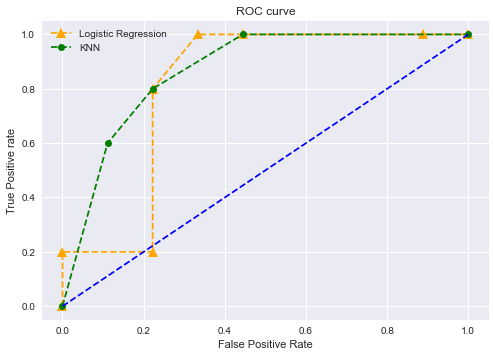

In [12]:
#plot the roc curve of three models i.e. Logistic Regression, KNN and Random Model
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1,marker="^",markersize=10, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,marker="o", linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

In [13]:
#Looking into the plot and AUC curve we conclude that both model are of equal efficient
#Let us consider the logistic regression
#Let say True Positive is very important irrespective of False Positive, that means
#False positive may be high that is not important
#Here the 5th point is the point where True Positive is high and False positive
#is also less so we will take the threshold as threshold1=0.15 and predict
threshold1=0.15
pred1=[]
for i in pred_prob1[:,1]:
    if i>threshold1:
        pred1.append(1)
    else:
        pred1.append(0)
print("Original")
print(y_test)
print("Predicted")
print(pred1)

Original
1     0
44    0
33    1
14    1
41    1
22    1
16    1
18    0
3     0
36    0
20    0
37    0
27    0
38    0
Name: bought_insurance, dtype: int64
Predicted
[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0]


In [14]:
#print the confusion matrix and classification matrix
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test,pred1))

[[6 3]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.62      1.00      0.77         5

    accuracy                           0.79        14
   macro avg       0.81      0.83      0.78        14
weighted avg       0.87      0.79      0.79        14

